# importing libraries & data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv('laptops.csv',encoding='latin-1')

In [3]:
df.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [4]:
df.shape

(1303, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


# Cleaning data

Remove extra unnecessary details from Product Column

In [3]:
df["Product"] = df["Product"].str.split("(").apply(lambda x: x[0])

In [4]:
df["Product"] 

0              MacBook Pro
1              Macbook Air
2                   250 G6
3              MacBook Pro
4              MacBook Pro
               ...        
1298        Yoga 500-14ISK
1299        Yoga 900-13ISK
1300    IdeaPad 100S-14IBR
1301           15-AC110nv 
1302        X553SA-XX031T 
Name: Product, Length: 1303, dtype: object

In [5]:
df.columns

Index(['Unnamed: 0', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

Extract CPU Vender, CPU Type and CPU Speed in Different Columns

In [6]:
df["Cpu_Speed"] = df["Cpu"].str.split(" ").apply(lambda x: x[-1]).str.replace("GHz", "")
df["Cpu_Vender"] = df["Cpu"].str.split(" ").apply(lambda x: x[0])
df["Cpu_Type"] = df["Cpu"].str.split(" ").apply(lambda x: x[1:4] if x[1] == "Celeron" and "Pentium" and "Xeon" else (x[1:3] if (x[1] == "Core" or x[0] == "AMD") else x[0]) )
df["Cpu_Type"] = df["Cpu_Type"].apply(lambda x: ' '.join(x))
df.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Speed,Cpu_Vender,Cpu_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2.3,Intel,Core i5
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94,1.8,Intel,Core i5
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00,2.5,Intel,Core i5
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2.7,Intel,Core i7
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,3.1,Intel,Core i5


Extract Memory type from Memory Column

In [7]:
split_mem = df['Memory'].str.split(' ', 1, expand=True)
df['Storage Type'] = split_mem[1]
df['Memory'] = split_mem[0]
df["Memory"].unique()
df.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,Cpu_Speed,Cpu_Vender,Cpu_Type,Storage Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2.3,Intel,Core i5,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB,Intel HD Graphics 6000,macOS,1.34kg,898.94,1.8,Intel,Core i5,Flash Storage
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB,Intel HD Graphics 620,No OS,1.86kg,575.00,2.5,Intel,Core i5,SSD
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2.7,Intel,Core i7,SSD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,3.1,Intel,Core i5,SSD


In [8]:
df["Ram"] = df["Ram"].str.replace("GB", "")

df_mem= df['Memory'].str.split('(\d+)',  expand=True)
df['Memory'] = pd.to_numeric(df_mem[1])
df.rename(columns={'Memory':'Memory (GB or TB)'}, inplace=True)

def mem(x):
    if x == 1:
        return 1024
    elif x == 2:
        return 2048
df['Memory (GB or TB)'] = df['Memory (GB or TB)'].apply(lambda x: 1024 if x==1 else x)
df['Memory (GB or TB)'] = df['Memory (GB or TB)'].apply(lambda x: 2048 if x==2 else x)
df.rename(columns={'Memory (GB or TB)':'Storage (GB)'}, inplace=True)
df.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Storage (GB),Gpu,OpSys,Weight,Price_euros,Cpu_Speed,Cpu_Vender,Cpu_Type,Storage Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69,2.3,Intel,Core i5,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34kg,898.94,1.8,Intel,Core i5,Flash Storage
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86kg,575.00,2.5,Intel,Core i5,SSD
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83kg,2537.45,2.7,Intel,Core i7,SSD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60,3.1,Intel,Core i5,SSD


Convert Weight into numeric Values

In [9]:
df["Weight"] = df["Weight"].str.replace("kg", "")
df.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Storage (GB),Gpu,OpSys,Weight,Price_euros,Cpu_Speed,Cpu_Vender,Cpu_Type,Storage Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,Intel,Core i5,SSD
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,Intel,Core i5,Flash Storage
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86,575.00,2.5,Intel,Core i5,SSD
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,Intel,Core i7,SSD
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,Intel,Core i5,SSD


Extract GPU Vender, GPU Type in Different Columns

In [10]:
gpu_distribution_list = df["Gpu"].str.split(" ")
df["Gpu_Vender"] = df["Gpu"].str.split(" ").apply(lambda x: x[0])
df["Gpu_Type"] = df["Gpu"].str.split(" ").apply(lambda x: x[1:])
df["Gpu_Type"] = df["Gpu_Type"].apply(lambda x: ' '.join(x))
df.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Storage (GB),Gpu,OpSys,Weight,Price_euros,Cpu_Speed,Cpu_Vender,Cpu_Type,Storage Type,Gpu_Vender,Gpu_Type
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69,2.3,Intel,Core i5,SSD,Intel,Iris Plus Graphics 640
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,898.94,1.8,Intel,Core i5,Flash Storage,Intel,HD Graphics 6000
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86,575.00,2.5,Intel,Core i5,SSD,Intel,HD Graphics 620
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,2537.45,2.7,Intel,Core i7,SSD,AMD,Radeon Pro 455
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60,3.1,Intel,Core i5,SSD,Intel,Iris Plus Graphics 650


Extract IPS and Touchscreen Feature from ScreenResolution Column

In [11]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.head()

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Storage (GB),Gpu,...,Weight,Price_euros,Cpu_Speed,Cpu_Vender,Cpu_Type,Storage Type,Gpu_Vender,Gpu_Type,Touchscreen,Ips
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,...,1.37,1339.69,2.3,Intel,Core i5,SSD,Intel,Iris Plus Graphics 640,0,1
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,...,1.34,898.94,1.8,Intel,Core i5,Flash Storage,Intel,HD Graphics 6000,0,0
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,...,1.86,575.00,2.5,Intel,Core i5,SSD,Intel,HD Graphics 620,0,0
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,...,1.83,2537.45,2.7,Intel,Core i7,SSD,AMD,Radeon Pro 455,0,1
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,...,1.37,1803.60,3.1,Intel,Core i5,SSD,Intel,Iris Plus Graphics 650,0,1


Catorizing The Operating System

In [12]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

df['OpSys'] = df['OpSys'].apply(cat_os)

Fetching out the Usefull Columns & leaving the rest

In [13]:
df = df.reindex(columns=["Company", "TypeName", "Inches", "Touchscreen", "Ips", "Cpu_Vender",
                    "Cpu_Type","Ram", "Storage (GB)", "Storage Type", "Gpu_Vender", "Gpu_Type",
                    "Weight", "OpSys", "Price_euros" ])

In [14]:
df.head()

,Company,TypeName,Inches,Touchscreen,Ips,Cpu_Vender,Cpu_Type,Ram,Storage (GB),Storage Type,Gpu_Vender,Gpu_Type,Weight,OpSys,Price_euros
0,Apple,Ultrabook,13.3,0,1,Intel,Core i5,8,128,SSD,Intel,Iris Plus Graphics 640,1.37,Mac,1339.69
1,Apple,Ultrabook,13.3,0,0,Intel,Core i5,8,128,Flash Storage,Intel,HD Graphics 6000,1.34,Mac,898.94
2,HP,Notebook,15.6,0,0,Intel,Core i5,8,256,SSD,Intel,HD Graphics 620,1.86,Others/No OS/Linux,575.00
3,Apple,Ultrabook,15.4,0,1,Intel,Core i7,16,512,SSD,AMD,Radeon Pro 455,1.83,Mac,2537.45
4,Apple,Ultrabook,13.3,0,1,Intel,Core i5,8,256,SSD,Intel,Iris Plus Graphics 650,1.37,Mac,1803.60


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1303 non-null   object 
 1   TypeName      1303 non-null   object 
 2   Inches        1303 non-null   float64
 3   Touchscreen   1303 non-null   int64  
 4   Ips           1303 non-null   int64  
 5   Cpu_Vender    1303 non-null   object 
 6   Cpu_Type      1303 non-null   object 
 7   Ram           1303 non-null   object 
 8   Storage (GB)  1303 non-null   int64  
 9   Storage Type  1303 non-null   object 
 10  Gpu_Vender    1303 non-null   object 
 11  Gpu_Type      1303 non-null   object 
 12  Weight        1303 non-null   object 
 13  OpSys         1303 non-null   object 
 14  Price_euros   1303 non-null   float64
dtypes: float64(2), int64(3), object(10)
memory usage: 152.8+ KB


Transforming the data type of Ram, Storage & Weight

In [16]:
df["Ram"] = df["Ram"].astype("int")
df["Storage (GB)"] = df["Storage (GB)"].astype("int")
df["Weight"] = df["Weight"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Company       1303 non-null   object 
 1   TypeName      1303 non-null   object 
 2   Inches        1303 non-null   float64
 3   Touchscreen   1303 non-null   int64  
 4   Ips           1303 non-null   int64  
 5   Cpu_Vender    1303 non-null   object 
 6   Cpu_Type      1303 non-null   object 
 7   Ram           1303 non-null   int32  
 8   Storage (GB)  1303 non-null   int32  
 9   Storage Type  1303 non-null   object 
 10  Gpu_Vender    1303 non-null   object 
 11  Gpu_Type      1303 non-null   object 
 12  Weight        1303 non-null   float64
 13  OpSys         1303 non-null   object 
 14  Price_euros   1303 non-null   float64
dtypes: float64(3), int32(2), int64(2), object(8)
memory usage: 142.6+ KB


In [17]:
backup = df.to_csv("laptop_price.csv")

# Data Analysis

In [21]:
sns.set(rc={"figure.figsize":(9, 5)})

<AxesSubplot:>

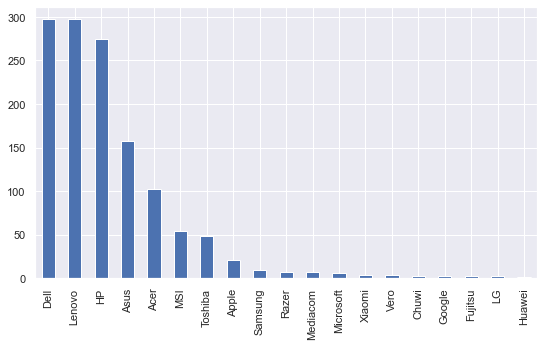

In [22]:
df["Company"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='Company', ylabel='Price_euros'>

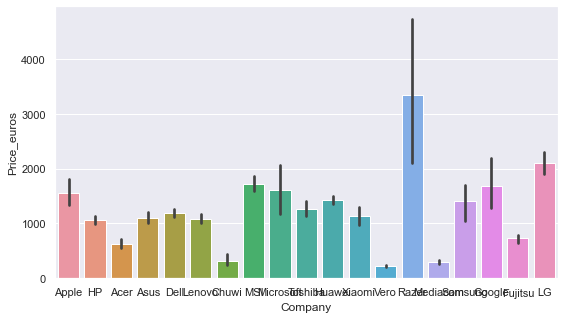

In [23]:
sns.barplot(x=df["Company"], y=df["Price_euros"])

<AxesSubplot:>

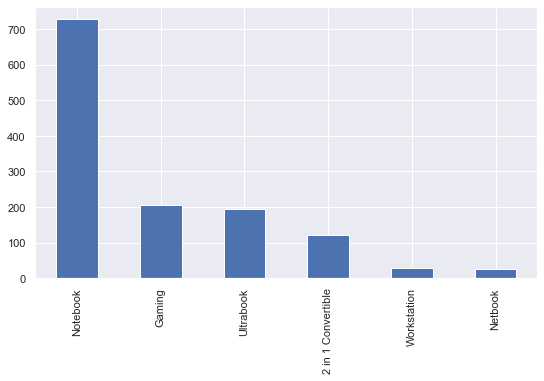

In [24]:
df["TypeName"].value_counts().plot(kind="bar")

<AxesSubplot:xlabel='TypeName', ylabel='Price_euros'>

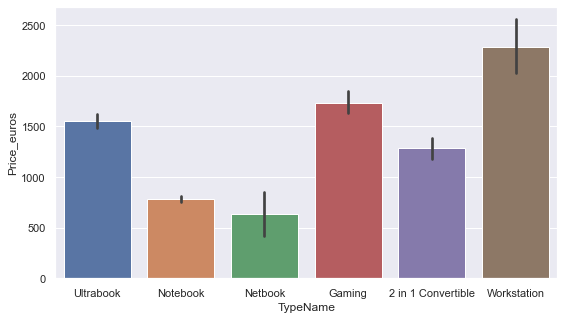

In [25]:
sns.barplot(x=df['TypeName'],y=df['Price_euros'])

In [18]:
cpu_distribution = df["Cpu_Type"].value_counts()[:10].reset_index()
cpu_distribution

,index,Cpu_Type
0,Core i7,527
1,Core i5,423
2,Core i3,136
3,Celeron Dual Core,80
4,I n t e l,47
5,Core M,19
6,A9-Series 9420,12
7,Celeron Quad Core,8
8,A6-Series 9220,8
9,A12-Series 9720P,7


<AxesSubplot:xlabel='index', ylabel='Cpu_Type'>

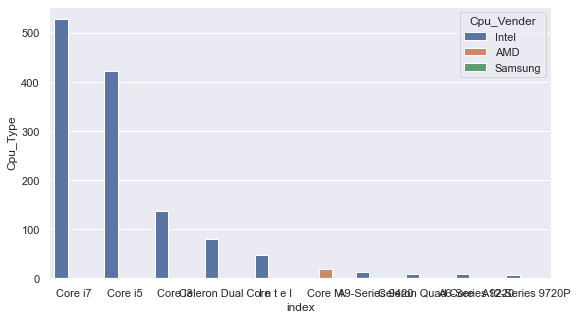

In [27]:
sns.barplot(x=cpu_distribution["index"], y=cpu_distribution["Cpu_Type"], hue="Cpu_Vender", data=df)

# Prediction Logic

In [19]:
X = df.drop(columns=['Price_euros'])
y = np.log(df['Price_euros'])

In [20]:
X.nunique()

Company          19
TypeName          6
Inches           18
Touchscreen       2
Ips               2
Cpu_Vender        3
Cpu_Type         32
Ram               9
Storage (GB)     13
Storage Type     12
Gpu_Vender        4
Gpu_Type        110
Weight          171
OpSys             3
dtype: int64

In [22]:
X['Gpu_Type'].unique()

array(['Iris Plus Graphics 640', 'HD Graphics 6000', 'HD Graphics 620',
       'Radeon Pro 455', 'Iris Plus Graphics 650', 'Radeon R5',
       'Iris Pro Graphics', 'GeForce MX150', 'UHD Graphics 620',
       'HD Graphics 520', 'Radeon Pro 555', 'Radeon R5 M430',
       'HD Graphics 615', 'Radeon Pro 560', 'GeForce 940MX',
       'HD Graphics 400', 'GeForce GTX 1050', 'Radeon R2', 'Radeon 530',
       'GeForce 930MX', 'HD Graphics', 'HD Graphics 500',
       'GeForce 930MX ', 'GeForce GTX 1060', 'GeForce 150MX',
       'Iris Graphics 540', 'Radeon RX 580', 'GeForce 920MX',
       'Radeon R4 Graphics', 'Radeon 520', 'GeForce GTX 1070',
       'GeForce GTX 1050 Ti', 'GeForce MX130', 'R4 Graphics',
       'GeForce GTX 940MX', 'Radeon RX 560', 'GeForce 920M',
       'Radeon R7 M445', 'Radeon RX 550', 'GeForce GTX 1050M',
       'HD Graphics 515', 'Radeon R5 M420', 'HD Graphics 505',
       'GTX 980 SLI', 'R17M-M1-70', 'GeForce GTX 1080', 'Quadro M1200',
       'GeForce 920MX ', 'GeForce GTX

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from xgboost import XGBRegressor

In [31]:
step1 = ColumnTransformer(transformers=[

('col_tnf',OneHotEncoder(sparse=False,drop='first',handle_unknown='ignore'),[0,1,5,6,9,10,11,13])

],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,

random_state=3,

max_samples=0.5,

max_features=0.75,

max_depth=15)

pipe = Pipeline([

('step1',step1),

('step2',step2)

])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))

print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.897476064342919
MAE 0.15086711085099827


c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [3, 6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [32]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [33]:
ipe = pickle.load(open("pipe.pkl", "rb"))

In [34]:
q=np.array(['HP','Notebook',13.3,0,1,'Intel','Core i5',4,500,'HDD','Intel','UHD Graphics 620',1.49,'Window'])

In [35]:
q=q.reshape(1,14)

In [36]:
p = str(int(np.exp(ipe.predict(q)[0])))

c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(
c:\Users\Dell\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\preprocessing\_encoders.py:170: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [37]:
p

'791'